In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse
import copy
import shutil
import glob
import time
import math
import torch


(1000, 64)
0.0
3.0226314


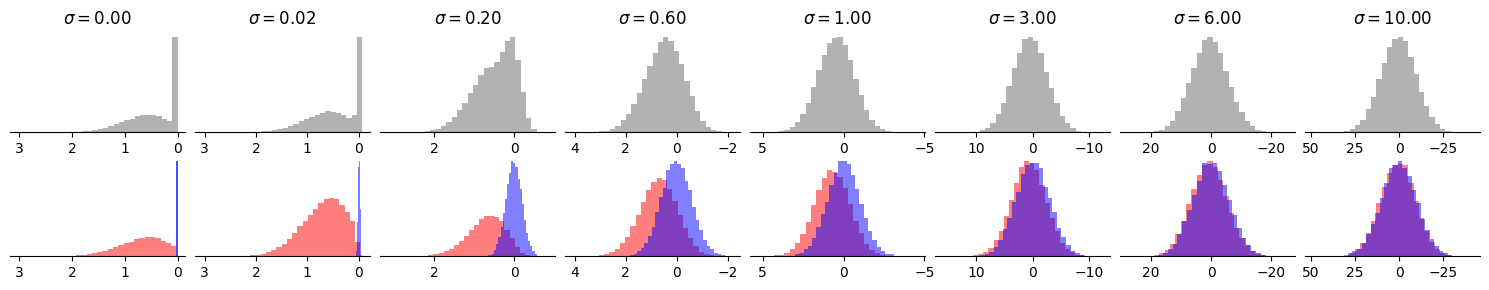

In [48]:

# val_features = np.load('../SWAP/test_biked_Inception_features.npy', mmap_mode='r')
val_features = np.load('../SWAP/test_biked_DAE.npy', mmap_mode='r')

print(val_features.shape)
print(val_features.min())
print(val_features.max())

t_steps = [0, 0.02, 0.2, 0.6, 1.0, 3.0, 6.0, 10.0]

checking_image_values =  torch.tensor(val_features[:1000]).flatten()

feature_map = []
background_map = []
for i in range(checking_image_values.shape[0]):
    if checking_image_values[i] >= 0.0200:
        feature_map.append(i)
    elif checking_image_values[i] < 0.0200:
        background_map.append(i)

list_of_flatten = [checking_image_values.flatten()]
list_of_feature = [checking_image_values.flatten()[feature_map]]
list_of_background = [checking_image_values.flatten()[background_map]]

for i, t_cur in enumerate(t_steps[1:]):
    checking_images = checking_image_values + (t_cur) * torch.randn_like(checking_image_values)
    list_of_flatten.append(checking_images.flatten())
    list_of_feature.append(checking_images.flatten()[feature_map])
    list_of_background.append(checking_images.flatten()[background_map])

num_bins = 30

plt.figure(figsize=(15, 3))
plt.ioff()
for t in range(len(t_steps)):
    ax = plt.subplot(2, len(t_steps), t+1)

    density = True
    plt.hist(list_of_flatten[t].numpy(), num_bins, density = density, color= 'black', alpha=0.3)
    title = r'$\sigma=$'+ f'%.2f'%t_steps[t]
    plt.title(title)
    ax.invert_xaxis()
    plt.yticks([]) 
    # if t<=3:
    #     plt.xticks([-1,1],['-1','1']) 
    # if t <=1:
    #     plt.ylim(0, 1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # plt.axis('off')
    plt.tight_layout(h_pad=0, w_pad=0)


    ax = plt.subplot(2, len(t_steps), t+1*len(t_steps)+1)

    if t ==0:
        plt.hist(list_of_feature[t].numpy(), num_bins, density = False , color= 'r',label = 'object', alpha=0.5)
        plt.hist(list_of_background[t].numpy(), 1, density = False, color= 'b',label = 'background', alpha=0.7)
    elif t ==1:
        plt.hist(list_of_feature[t].numpy(), num_bins, density = False , color= 'r',label = 'object', alpha=0.5)
        plt.hist(list_of_background[t].numpy(), 8, density = False, color= 'b',label = 'background', alpha=0.5)
    else:
        plt.hist(list_of_feature[t].numpy(), num_bins, density = True , color= 'r',label = 'object', alpha=0.5)
        plt.hist(list_of_background[t].numpy(), num_bins, density = True, color= 'b',label = 'background', alpha=0.5)
    
    # plt.ylabel('density') 
    plt.yticks([]) 
    ax.invert_xaxis()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

plt.show()


In [ ]:

# t_steps = [0, 0.02, 0.2, 0.6, 1.0, 3.0, 6.0, 10.0]
t_steps = [0, 0.6, 5.3, 40]
# t_steps = [0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
# t_steps = [0]
# 
init_checking_images = torch.tensor(val_images[:10])

checking_image_values = init_checking_images.flatten()
feature_map = []
background_map = []
for i in range(checking_image_values.shape[0]):
    if checking_image_values[i]<=0.85:
        feature_map.append(i)
    elif checking_image_values[i]>0.85:
        background_map.append(i)
        
list_of_flatten = [init_checking_images.flatten()]
list_of_feature = [init_checking_images.flatten()[feature_map]]
print(np.asarray(list_of_feature[0]).std())

for i, t_cur in enumerate(t_steps[1:]):
    checking_images = init_checking_images + (t_cur) * torch.randn_like(init_checking_images)
    list_of_flatten.append(checking_images.flatten())
    list_of_feature.append(checking_images.flatten()[feature_map])
    list_of_background.append(checking_images.flatten()[background_map])
    list_of_kld.append(KL(checking_images.flatten()[feature_map], checking_images.flatten()[background_map]))
    list_of_images.append(checking_images[0])        
    list_of_shapiro.append(shapiro(checking_images.flatten()[feature_map])) 

list_of_shapiro = np.asarray(list_of_shapiro)

print(list_of_shapiro)
print(list_of_shapiro.shape)
print(list_of_kld)
num_bins = 1000

o = 0
for image in list_of_images:
    plt.figure(figsize=(6, 6))
    plt.ioff()
    o+=1 
    plt.imshow((image/2+0.5).numpy(), cmap='gray')
    plt.axis('off')
    plt.tight_layout(h_pad=0, w_pad=0)
    plt.savefig(f'image_analysis/Biked/save_step_images/{o}.png')

plt.figure(figsize=(50, 5))
plt.ioff()
for t in range(len(t_steps)):
    plt.subplot(3, len(t_steps), t+1)

    density = True
    plt.hist(list_of_flatten[t].numpy(), num_bins, density = density, color= 'black', alpha=0.3)
    title = r'$\sigma=$'+ f'%.2f'%t_steps[t]
    plt.title(title)
    plt.yticks([]) 
    if t<=3:
        plt.xticks([-1,1],['-1','1']) 
    if t <=1:
        plt.ylim(0, 1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # plt.axis('off')
    
    plt.subplot(3, len(t_steps), t+len(t_steps)+1)

    plt.imshow((list_of_images[t]/2+0.5).numpy(), cmap='gray')
    plt.axis('off')

    plt.subplot(3, len(t_steps), t+2*len(t_steps)+1)

    if t ==0:
        plt.hist(list_of_feature[t].numpy(), num_bins, density = False , color= 'r',label = 'object', alpha=0.5)
        plt.hist(list_of_background[t].numpy(), 90, density = False, color= 'b',label = 'background', alpha=0.5)
    elif t ==1:
        plt.hist(list_of_feature[t].numpy(), num_bins, density = False , color= 'r',label = 'object', alpha=0.5)
        plt.hist(list_of_background[t].numpy(), 3800, density = False, color= 'b',label = 'background', alpha=0.5)
    else:
        plt.hist(list_of_feature[t].numpy(), num_bins, density = True , color= 'r',label = 'object', alpha=0.5)
        plt.hist(list_of_background[t].numpy(), num_bins, density = True, color= 'b',label = 'background', alpha=0.5)
    
    # plt.ylabel('density') 
    plt.yticks([]) 
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    if t <=3:
        plt.xticks([-1,1],['-1','1']) 

    if t ==0:
        plt.legend(loc='upper right')
    if t <=1:
        # plt.ylim(0, 3)
        plt.ylim(0, 10000)
    plt.tight_layout(h_pad=0, w_pad=0)

plt.show()